<a href="https://colab.research.google.com/github/astelrastogi/ARyogaApp/blob/main/KEmoCon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [96]:
from biosppy.signals import bvp
from biosppy.signals import eda

In [ ]:
pathToSelfAnnotations = '/content/kemo/emotion_annotations/self_annotations'
pathToe4 = '/content/kemo/e4_data'
pathToExtAnnotations = '/content/kemo/emotion_annotations/aggregated_external_annotations'
pathToSub = '/content/kemo/metadata'

In [ ]:
!gdown --id 1-t_Ly--mbUcCMimYCcdDc1zbFX9IqlAE
!unzip kemo.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-t_Ly--mbUcCMimYCcdDc1zbFX9IqlAE
To: /content/kemo/kemo.zip
100% 6.82G/6.82G [00:53<00:00, 127MB/s]
Archive:  kemo.zip
   creating: kemo/
 extracting: kemo/data_quality_tables.tar.gz  
 extracting: kemo/debate_audios.tar.gz  
 extracting: kemo/debate_recordings.tar.gz  
 extracting: kemo/e4_data.tar.gz     
 extracting: kemo/emotion_annotations.tar.gz  
 extracting: kemo/metadata.tar.gz    
 extracting: kemo/neurosky_polar_data.tar.gz  


In [ ]:
%cd '/content/kemo'
!tar -xf data_quality_tables.tar.gz
!tar -xf e4_data.tar.gz
!tar -xf emotion_annotations.tar.gz
!tar -xf metadata.tar.gz
!tar -xf neurosky_polar_data.tar.gz
!tar -xf debate_audios.tar.gz
!tar -xf debate_recordings.tar.gz

/content/kemo


In [ ]:
!rm -rf K-Emo*
!git clone 'https://github.com/yrzaa/K-EmoCon_SupplementaryCodes'

Cloning into 'K-EmoCon_SupplementaryCodes'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 217 (delta 1), reused 1 (delta 1), pack-reused 211
Receiving objects: 100% (217/217), 83.67 KiB | 2.61 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [ ]:
!python /content/kemo/K-EmoCon_SupplementaryCodes/scripts/preprocess.py --root '.'

[2022/10/04 17:15:00] INFO - Read/writing files to ....
[2022/10/04 17:15:00] INFO - Preprocessing started, aggregating raw files...
[2022/10/04 17:15:05] INFO - Getting baseline and debate data...
--------------------------------------------------------------------------------
For 1/bvp:	 baseline - 0:01:59:  7680 	|	 debate - 0:14:11: 54528
For 1/eda:	 baseline - 0:01:59:   480 	|	 debate - 0:14:11:  3408
For 1/hr:	 baseline - 0:01:49:   110 	|	 debate - 0:14:11:   852
For 1/ibi:	 baseline - 0:00:57:    47 	|	 debate - 0:11:52:   227
For 1/temp:	 baseline - 0:01:59:   480 	|	 debate - 0:14:11:  3408
For 1/ecg:	 baseline - 0:01:43:   104 	|	 debate - 0:14:11:   846
--------------------------------------------------------------------------------
For 4/bvp:	 baseline - 0:01:59:  7680 	|	 debate - 0:11:25: 43904
For 4/eda:	 baseline - 0:01:59:   480 	|	 debate - 0:11:25:  2744
For 4/hr:	 baseline - 0:01:49:   110 	|	 debate - 0:11:25:   686
[2022/10/04 17:15:05] WARNING - Debate data mis

## Exact duration of experiment

In [ ]:
md = pd.read_csv(pathToSub+'/subjects.csv')
md['diff'] = (md['endTime'] - md['startTime'])/1000
expTime = md[['diff', 'startTime']]
print(expTime)
# print(expTime[0])

     diff      startTime
0   852.0  1548120820000
1   852.0  1548120816000
2   686.0  1548137965000
3   686.0  1548137961000
4   627.0  1548206905000
5   627.0  1548206906000
6   611.0  1548224623000
7   611.0  1548224621000
8   614.0  1548725858000
9   614.0  1548725861000
10  610.0  1548831934000
11  610.0  1548831937000
12  609.0  1548898955000
13  609.0  1548898956000
14  613.0  1549935390000
15  613.0  1549935389000
16  730.0  1552030184000
17  730.0  1552030167000
18  619.0  1552117901000
19  619.0  1552117894000
20  604.0  1552378718000
21  604.0  1552378669000
22  606.0  1552624550000
23  606.0  1552624528000
24  621.0  1552633669000
25  621.0  1552633654000
26  645.0  1552895231000
27  645.0  1552895259000
28  640.0  1553835417000
29  640.0  1553835415000
30  656.0  1553844121000
31  656.0  1553844125000


## ACC 
E4_ACC.csv – measurements from a 3-axis accelerometer sampled at 32Hz in the range [−2g, 2g] under columns x, y, and z. Multiply raw numbers by 1/64 to convert them into units of g (i.e., a raw value of 64 is equivalent to 1g).

1548724972000.0


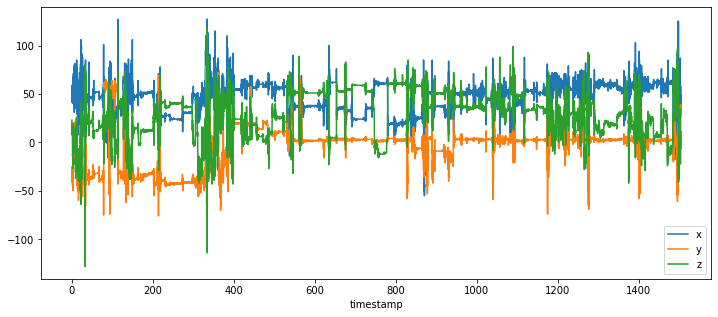

In [ ]:
dfACC = pd.read_csv(pathToe4+'/10/E4_ACC.csv')
dfACC = dfACC[['timestamp','x','y','z']]
baseTime = dfACC['timestamp'][0]
print(baseTime)
dfACC.timestamp = (dfACC.timestamp-baseTime)/1000
dfACC.set_index("timestamp", inplace=True)
dfACC.plot(figsize=(12,5))

## BVP
E4_BVP.csv – PPG measurements sampled at 64Hz.

1548724972000.0
           value
timestamp       
0.00000      0.0
0.01562      0.0
0.03125      0.0
0.04688      0.0
0.06250      0.0


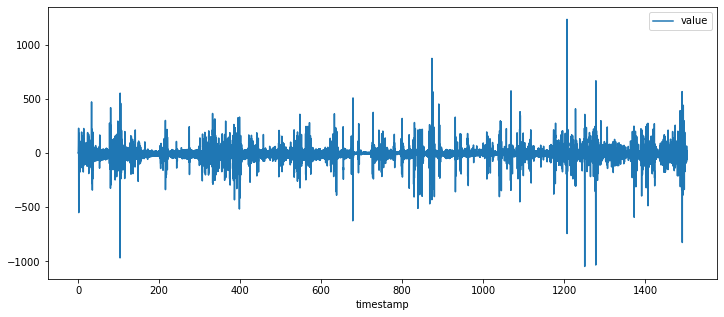

In [ ]:
dfBVP = pd.read_csv(pathToe4+'/10/E4_BVP.csv')
# print(dfBVP.head())
dfBVP = dfBVP[['timestamp','value']]
baseTime = dfBVP['timestamp'][0]
print(baseTime)
dfBVP.timestamp = (dfBVP.timestamp-baseTime)/1000
dfBVP.set_index("timestamp", inplace=True)
print(dfBVP.head())
dfBVP.plot(figsize=(12,5))

[ 0.    0.    0.   ... -4.19  9.16 20.94]


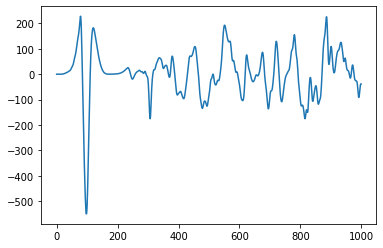

In [ ]:
bvpArr = dfBVP.to_numpy()
bvpArr = bvpArr.ravel()
plt.plot(bvpArr[:1000])
print(bvpArr)

ReturnTuple(ts=array([0.00000000e+00, 1.56248376e-02, 3.12496751e-02, ...,
       1.50295313e+03, 1.50296875e+03, 1.50298438e+03]), filtered=array([ -1.18344745,   0.06536324,   1.39553145, ..., -15.38964623,
        -5.90969795,   2.77006061]), onsets=array([   21,    79,   116, ..., 96047, 96098, 96156]), heart_rate_ts=array([1.23436217e+00, 1.81248116e+00, 2.73434657e+00, ...,
       1.50071877e+03, 1.50151564e+03, 1.50242188e+03]), heart_rate=array([78.73252563, 78.35847537, 77.9844251 , ..., 71.01549953,
       72.76700473, 69.23597025]))


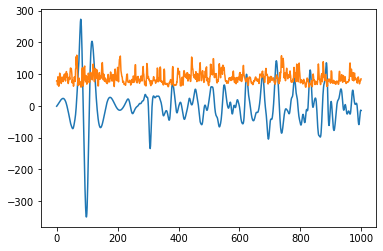

In [ ]:
x = bvp.bvp(signal=bvpArr, sampling_rate=64, show=False)
print(x)
plt.plot(x["filtered"][:1000])
plt.plot(x["heart_rate"][:1000])

## EDA - [GSR]
E4_EDA.csv – EDA sensor readings in units of μS, sampled at 4Hz.



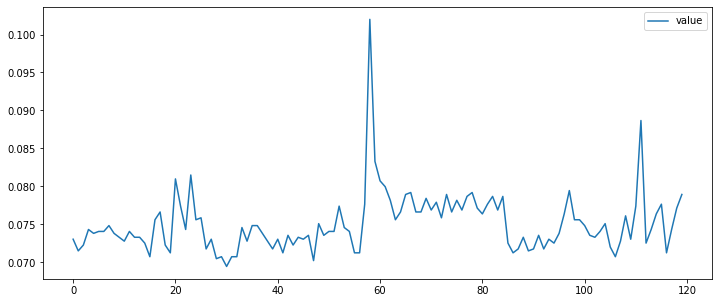

In [94]:
dfEDA = pd.read_csv(pathToe4+'/10/E4_EDA.csv')
n = int(expTime['diff'][9])
m = dfEDA.shape[0]
dfEDA = dfEDA[-n:]
dfEDA = dfEDA[['timestamp','value']]
baseTime = dfEDA['timestamp'][m-n]
dfEDA.timestamp = (dfEDA.timestamp-baseTime)/1000
dfEDA.set_index("timestamp", inplace=True)
dfEDA = dfEDA.groupby(np.arange(len(dfEDA))//5).mean()[:120]
dfEDA.plot(figsize=(12,5))

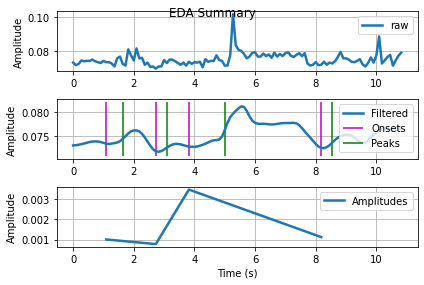

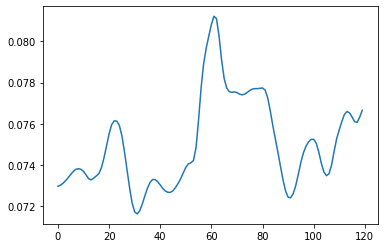

In [119]:
edaArr = dfEDA.to_numpy()
edaArr = edaArr.ravel()
# x = eda.basic_scr(signal=edaArr, sampling_rate=4.0)
x = eda.eda(signal=edaArr, sampling_rate=11.0, show=True, min_amplitude=0.1)
# print(x)
# plt.plot(x["onsets"])
# plt.plot(x["peaks"])
# plt.plot(x["amplitudes"])
plt.plot(x["filtered"])

## HR
E4_HR.csv – the average heart rates calculated in 10-second windows. The values are derived from the BVP measurements, and the values are entered at the frequency of 1Hz. The first 10 seconds of data after the beginning of a recording is not included as the derivation algorithm requires the initial 10 seconds of data to produce the first value.

         timestamp  pid  value device_serial  device_number     entry_time
880   1.548726e+12   10  88.55        A01BBE              5  1548724982000
881   1.548726e+12   10  88.60        A01BBE              5  1548724982000
882   1.548726e+12   10  88.65        A01BBE              5  1548724982000
883   1.548726e+12   10  88.67        A01BBE              5  1548724982000
884   1.548726e+12   10  88.67        A01BBE              5  1548724982000
...            ...  ...    ...           ...            ...            ...
1489  1.548726e+12   10  64.43        A01BBE              5  1548724982000
1490  1.548726e+12   10  64.70        A01BBE              5  1548724982000
1491  1.548726e+12   10  64.97        A01BBE              5  1548724982000
1492  1.548726e+12   10  65.15        A01BBE              5  1548724982000
1493  1.548726e+12   10  65.43        A01BBE              5  1548724982000

[614 rows x 6 columns]


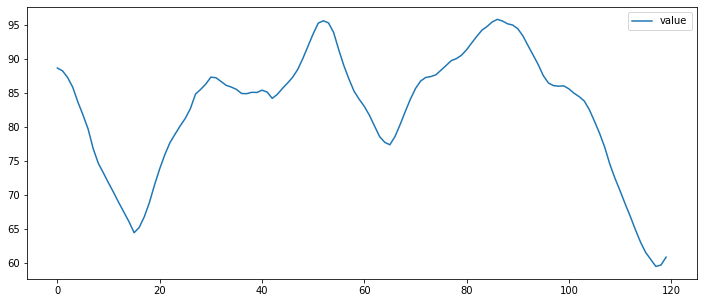

In [ ]:
dfHR = pd.read_csv(pathToe4+'/10/E4_HR.csv')
n = int(expTime['diff'][9])
m = dfHR.shape[0]
dfHR = dfHR[-n:]
print(dfHR)
dfHR = dfHR[['timestamp','value']]
baseTime = dfHR['timestamp'][m-n]
dfHR.timestamp = (dfHR.timestamp-baseTime)/1000
dfHR.set_index("timestamp", inplace=True)
dfHR = dfHR.groupby(np.arange(len(dfHR))//5).mean()[:120]
dfHR.plot(figsize=(12,5))

## IBI
E4_IBI.csv – IBI measurements in milliseconds computed from the BVP. From a second row onwards, one row is separated from the previous row with an amount equal to a distance between two peaks (i.e., ti+1 − ti = IBIi). Note that HR in terms of BPM can be derived from IBI by taking 60/IBI * 1000).

1548725013142.51
             value
timestamp         
0.00000    937.543
5.75026    890.666
6.68780    937.543
7.62535    937.543
8.50039    875.040


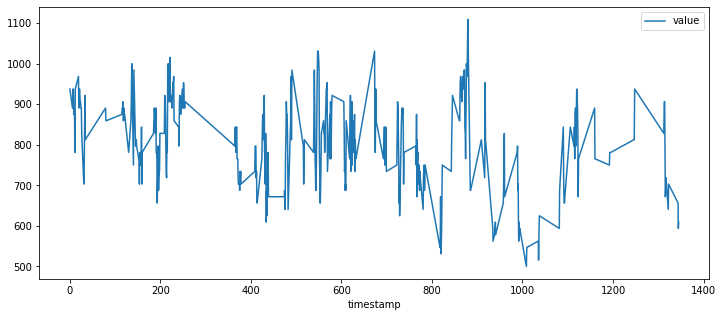

In [ ]:
dfIBI = pd.read_csv(pathToe4+'/10/E4_IBI.csv')
# print(dfIBI.head())
dfIBI = dfIBI[['timestamp','value']]
baseTime = dfIBI['timestamp'][0]
print(baseTime)
dfIBI.timestamp = (dfIBI.timestamp-baseTime)/1000
dfIBI.set_index("timestamp", inplace=True)
print(dfIBI.head())
dfIBI.plot(figsize=(12,5))
# dfHR = pd.read_csv(pathToe4+'/10/E4_TEMP.csv')
# n = int(expTime[9])
# m = dfHR.shape[0]
# dfHR = dfHR[-n:]
# dfHR = dfHR[['timestamp','value']]
# baseTime = dfHR['timestamp'][m-n]
# dfHR.timestamp = (dfHR.timestamp-baseTime)/1000
# dfHR.set_index("timestamp", inplace=True)
# dfHR = dfHR.groupby(np.arange(len(dfHR))//5).mean()[:120]
# dfHR.plot(figsize=(12,5))

## TEMP
E4_TEMP.csv – a body temperature measured in the Celsius scale at the frequency of 4Hz.

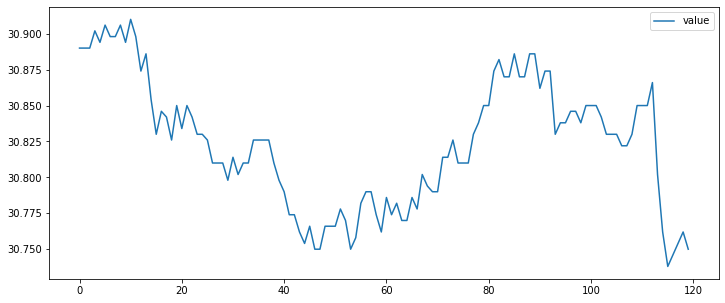

In [ ]:
dfTemp = pd.read_csv(pathToe4+'/10/E4_TEMP.csv')
n = int(expTime['diff'][9])
m = dfTemp.shape[0]
dfTemp = dfTemp[-n:]
dfTemp = dfTemp[['timestamp','value']]
baseTime = dfTemp['timestamp'][m-n]
dfTemp.timestamp = (dfTemp.timestamp-baseTime)/1000
dfTemp.set_index("timestamp", inplace=True)
dfTemp = dfTemp.groupby(np.arange(len(dfTemp))//5).mean()[:120]
dfTemp.plot(figsize=(12,5))

## Ground Truth - Self Annotation

In [ ]:
gt = pd.read_csv(pathToSelfAnnotations+'/P10.self.csv')
gt = gt[['seconds', 'arousal','valence','cheerful','happy','angry','nervous','sad']]
gt.set_index("seconds", inplace=True)
print(gt.head())

         arousal  valence  cheerful  happy  angry  nervous  sad
seconds                                                        
5              1        3         1      1      1        2    1
10             2        3         1      1      1        2    1
15             2        3         1      1      1        2    1
20             2        3         1      1      1        2    1
25             2        2         1      1      2        1    1


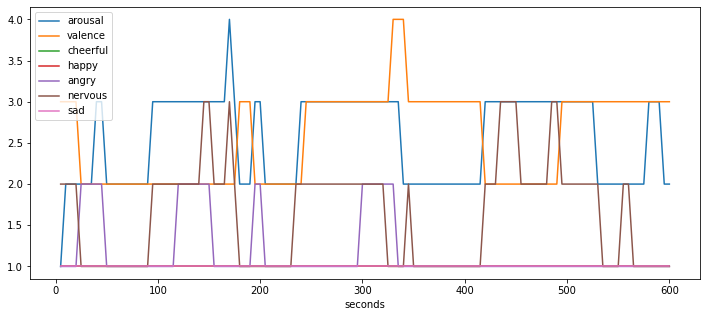

In [ ]:
gt.plot(figsize=(12,5))

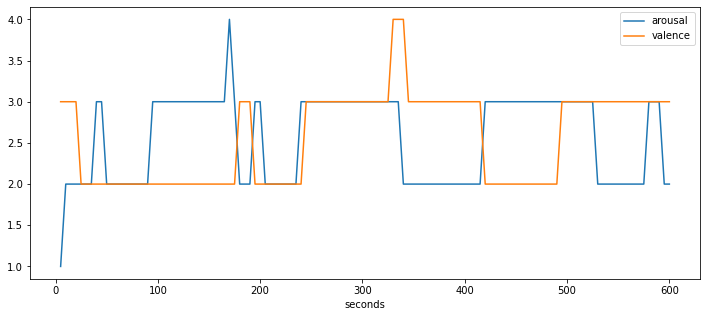

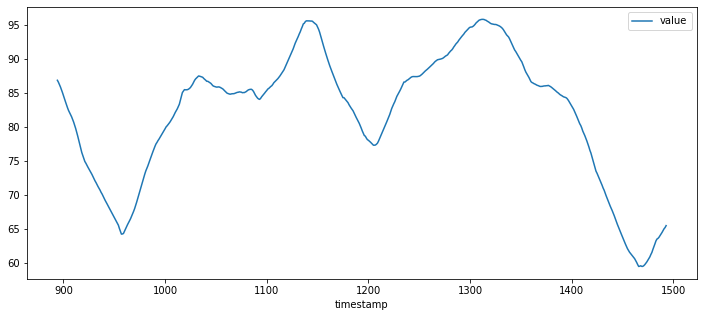

In [ ]:
gt = pd.read_csv(pathToSelfAnnotations+'/P10.self.csv')
gt = gt[['seconds', 'arousal','valence']]
gt.set_index("seconds", inplace=True)
# print(gt.head())
gt.plot(figsize=(12,5))

dfHR = pd.read_csv(pathToe4+'/10/E4_HR.csv')
# print(dfHR.head)
dfHR = dfHR[['timestamp','value']]
baseTime = dfHR['timestamp'][0]
# print(baseTime)
dfHR.timestamp = (dfHR.timestamp-baseTime)/1000
dfHR.set_index("timestamp", inplace=True)
dfHR = (dfHR.tail(600))
dfHR.plot(figsize=(12,5))

## Correlation

In [ ]:
list1 = dfHR['value']
list2 = gt['arousal'].repeat(5)
# list2 = gt['valence'].repeat(5)
# print(list2)
# print(list1)
corr, _ = pearsonr(list1, list2)
print(corr)

0.24830995566451966


#Changes in annotation


In [ ]:
ann_aggr = pd.DataFrame(index = None, columns=['person', 'valence_ch_ct', 'valence_ch_sum', 'arousal_ch_ct', 'arousal_ch_sum', 'count'],)

for i in range(32):
  df = pd.read_csv(pathToSelfAnnotations+f"/P{i+1}.self.csv")[["valence", "arousal"]]
  di = df.diff(axis=0)#!= 0).sum(axis=0))
  change_ct = (di!=0).sum(axis=0)
  change_sum = di.abs().sum(axis=0)
  ann_aggr.loc[len(ann_aggr.index)] = [i+1, change_ct[0]-1, change_sum[0], change_ct[1]-1, change_sum[1], df.count()[0]] 
display(ann_aggr)

,person,valence_ch_ct,valence_ch_sum,arousal_ch_ct,arousal_ch_sum,count
0,1.0,15.0,15.0,9.0,9.0,181.0
1,2.0,28.0,30.0,8.0,10.0,180.0
2,3.0,11.0,22.0,11.0,13.0,136.0
3,4.0,18.0,21.0,7.0,7.0,136.0
4,5.0,11.0,13.0,15.0,18.0,124.0
5,6.0,12.0,16.0,8.0,9.0,123.0
6,7.0,1.0,1.0,2.0,2.0,123.0
7,8.0,11.0,11.0,9.0,9.0,120.0
8,9.0,8.0,10.0,13.0,17.0,122.0
9,10.0,8.0,8.0,15.0,15.0,120.0


In [ ]:
(ann_aggr.mean())/130*100

person            12.692308
valence_ch_ct      8.870192
valence_ch_sum    11.177885
arousal_ch_ct      8.942308
arousal_ch_sum    11.201923
count             99.975962
dtype: float64